In [1]:
import pandas as pd   
import numpy as np

In [2]:
np.random.seed(42) 
data = {
'customer_id': np.random.randint(1000, 9999, 70),
'product_id': np.random.randint(100, 999, 70),
'category': np.random.choice(['Electronics', 'Clothing',
'Grocery', 'Home'], 70),
'price': np.random.uniform(10, 500, 70),
'quantity': np.random.randint(1, 10, 70),
'order_date': pd.date_range('2023-01-01', periods=70),
'city': np.random.choice(['Delhi', 'Mumbai',
'Bangalore', 'Kolkata'], 70),
'state': np.random.choice(['Delhi', 'Maharashtra',
'Karnataka', 'West Bengal'], 70),
'store_id': np.random.randint(1, 10, 70),
'discount_percent': np.random.uniform(0, 20, 70)
}

In [3]:
df=pd.DataFrame(data)
df

,customer_id,product_id,category,price,quantity,order_date,city,state,store_id,discount_percent
0,8270,152,Home,117.194468,9,2023-01-01,Bangalore,Karnataka,4,15.090857
1,1860,891,Grocery,283.469981,3,2023-01-02,Mumbai,Karnataka,5,2.062477
2,6390,316,Electronics,207.879724,9,2023-01-03,Kolkata,Karnataka,5,18.051058
3,6191,863,Home,41.797201,2,2023-01-04,Bangalore,West Bengal,7,10.105047
4,6734,287,Electronics,134.418553,2,2023-01-05,Delhi,West Bengal,4,16.529149
...,...,...,...,...,...,...,...,...,...,...
65,8892,653,Home,426.954940,2,2023-03-07,Mumbai,Karnataka,7,19.243451
66,7863,991,Home,468.461147,1,2023-03-08,Delhi,Delhi,5,7.497412
67,8916,560,Grocery,394.816919,8,2023-03-09,Kolkata,Maharashtra,1,5.714242
68,9529,790,Grocery,337.804245,1,2023-03-10,Kolkata,Maharashtra,7,17.371983


In [4]:
df['customer_id'].nunique()

70

In [5]:
df['total_sales']=df['price']*df['quantity']
df

,customer_id,product_id,category,price,quantity,order_date,city,state,store_id,discount_percent,total_sales
0,8270,152,Home,117.194468,9,2023-01-01,Bangalore,Karnataka,4,15.090857,1054.750208
1,1860,891,Grocery,283.469981,3,2023-01-02,Mumbai,Karnataka,5,2.062477,850.409943
2,6390,316,Electronics,207.879724,9,2023-01-03,Kolkata,Karnataka,5,18.051058,1870.917514
3,6191,863,Home,41.797201,2,2023-01-04,Bangalore,West Bengal,7,10.105047,83.594402
4,6734,287,Electronics,134.418553,2,2023-01-05,Delhi,West Bengal,4,16.529149,268.837106
...,...,...,...,...,...,...,...,...,...,...,...
65,8892,653,Home,426.954940,2,2023-03-07,Mumbai,Karnataka,7,19.243451,853.909880
66,7863,991,Home,468.461147,1,2023-03-08,Delhi,Delhi,5,7.497412,468.461147
67,8916,560,Grocery,394.816919,8,2023-03-09,Kolkata,Maharashtra,1,5.714242,3158.535352
68,9529,790,Grocery,337.804245,1,2023-03-10,Kolkata,Maharashtra,7,17.371983,337.804245


In [6]:
df['total_sales'].sum()

np.float64(89105.42290303741)

In [7]:
average_price=df[(df['category']=='Electronics')] ['price'].mean()
print(average_price)

253.23473540566178


In [8]:
grouped_data = df.groupby('product_id')['quantity'].sum()
max_product_id = grouped_data.idxmax()  # Use idxmax to get the product_id with the highest quantity
print(max_product_id)


114


In [9]:
max_sales_city = df.groupby('city')['total_sales'].sum().idxmax()
print(max_sales_city)

Kolkata


In [10]:
total_sales_quantity=df.groupby('category')['quantity'].sum()
print(total_sales_quantity)

category
Clothing       75
Electronics    96
Grocery        63
Home           75
Name: quantity, dtype: int32


In [11]:
df.head(1)

,customer_id,product_id,category,price,quantity,order_date,city,state,store_id,discount_percent,total_sales
0,8270,152,Home,117.194468,9,2023-01-01,Bangalore,Karnataka,4,15.090857,1054.750208


In [12]:
df['discount_price']=df['price']/100*df['discount_percent']
average_discount=df.groupby('product_id')['discount_price'].mean()
print(average_discount)

product_id
104    90.302682
114    60.702183
127    53.450169
132     5.917896
140    17.676564
         ...    
956    40.170166
957    51.920677
970     1.651341
971    21.302691
991    35.122460
Name: discount_price, Length: 67, dtype: float64


In [15]:
df.head()

,customer_id,product_id,category,price,quantity,order_date,city,state,store_id,discount_percent,total_sales,discount_price
0,8270,152,Home,117.194468,9,2023-01-01,Bangalore,Karnataka,4,15.090857,1054.750208,17.685650
1,1860,891,Grocery,283.469981,3,2023-01-02,Mumbai,Karnataka,5,2.062477,850.409943,5.846504
2,6390,316,Electronics,207.879724,9,2023-01-03,Kolkata,Karnataka,5,18.051058,1870.917514,37.524490
3,6191,863,Home,41.797201,2,2023-01-04,Bangalore,West Bengal,7,10.105047,83.594402,4.223627
4,6734,287,Electronics,134.418553,2,2023-01-05,Delhi,West Bengal,4,16.529149,268.837106,22.218243


In [14]:
march_order=df[(df['order_date'].dt.month==3)]['product_id'].count()
print(march_order)

11


In [17]:
state_order=df.groupby('state')['product_id'].count()
print(state_order)

state
Delhi          20
Karnataka      16
Maharashtra    19
West Bengal    15
Name: product_id, dtype: int64


In [21]:
top_5=df.groupby('product_id')['total_sales'].sum().nlargest()
print(top_5)

product_id
904    3784.301567
114    3453.034227
589    3209.512890
560    3158.535352
783    2962.047187
Name: total_sales, dtype: float64


In [24]:
df['month']=df['order_date'].dt.month
monthly_sales=df.groupby('month')['total_sales'].sum()

In [26]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

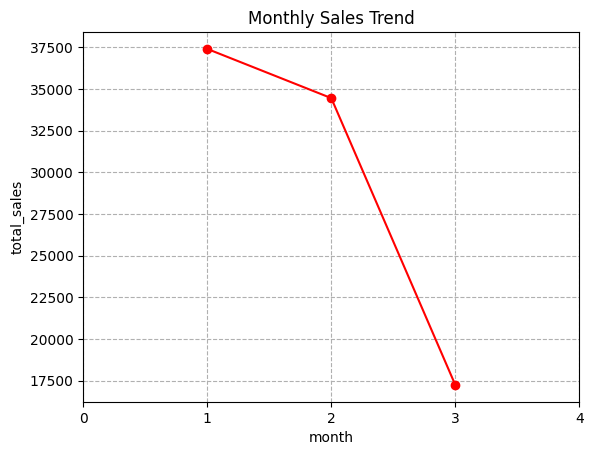

In [31]:
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', color='red')
plt.xlabel('month')
plt.ylabel('total_sales')
plt.title('Monthly Sales Trend')
plt.grid(linestyle='--')
plt.xticks([0,1,2,3,4])
plt.show